In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [2]:
ruta_txt = "C:\\Users\\fraja\\Desktop\\tipo_0.txt"
train_values = []
labels_values = []

with open(ruta_txt, 'r') as f:
    next(f)  # Saltar la primera línea que contiene el encabezado
    for line in f:
        w, x, y, z, etiqueta = map(float, line.strip().split(','))
        dato = [w, x, y, z]
        train_values.append(dato)
        labels_values.append(etiqueta)
    

labels_one_hot = to_categorical(labels_values)

print("train_values")
print(train_values)
print("labels_values")
print(labels_one_hot)

train_values
[[0.99438477, -0.10406494, 0.01849365, -0.00067139], [0.99450684, -0.10369873, 0.01599121, -0.00323486], [0.99481201, -0.10046387, 0.01550293, -0.00445557], [0.99475098, -0.10113525, 0.01483154, -0.00543213], [0.99499512, -0.09851074, 0.01605225, -0.00695801], [0.9954834, -0.0927124, 0.01745605, -0.00897217], [0.99591064, -0.08789062, 0.01849365, -0.01202393], [0.99639893, -0.08050537, 0.02008057, -0.01672363], [0.99645996, -0.07592773, 0.02160645, -0.02960205], [0.99578857, -0.07000732, 0.02148438, -0.05523682], [0.99359131, -0.0647583, 0.01867676, -0.09039307], [0.98962402, -0.06219482, 0.01672363, -0.12854004], [0.98358154, -0.06451416, 0.0144043, -0.16784668], [0.97625732, -0.05621338, 0.01660156, -0.20849609], [0.96716309, -0.05371094, 0.01580811, -0.24780273], [0.96075439, -0.0456543, 0.01617432, -0.27319336], [0.96075439, -0.0456543, 0.01617432, -0.27319336], [0.95861816, -0.03601074, 0.0178833, -0.28179932], [0.95837402, -0.03521729, 0.01794434, -0.28283691], [0.95

In [71]:
# Convertimos los datos en tensores
inputs = tf.convert_to_tensor(train_values, dtype=tf.float32)
labels = tf.convert_to_tensor(labels_one_hot, dtype=tf.float32)

# Creamos el modelo
model = Sequential([
    Dense(2, input_shape=(4,), activation='softmax')
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(inputs, labels, epochs=10, batch_size=8, verbose=2)

# Evaluamos el modelo
loss, accuracy = model.evaluate(inputs, labels_one_hot)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/10
1/1 - 1s - loss: 0.7993 - accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/10
1/1 - 0s - loss: 0.7985 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 3/10
1/1 - 0s - loss: 0.7978 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 4/10
1/1 - 0s - loss: 0.7970 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 5/10
1/1 - 0s - loss: 0.7963 - accuracy: 0.0000e+00 - 9ms/epoch - 9ms/step
Epoch 6/10
1/1 - 0s - loss: 0.7956 - accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step
Epoch 7/10
1/1 - 0s - loss: 0.7949 - accuracy: 0.0000e+00 - 6ms/epoch - 6ms/step
Epoch 8/10
1/1 - 0s - loss: 0.7941 - accuracy: 0.0000e+00 - 8ms/epoch - 8ms/step
Epoch 9/10
1/1 - 0s - loss: 0.7934 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 10/10
1/1 - 0s - loss: 0.7927 - accuracy: 0.0000e+00 - 9ms/epoch - 9ms/step
1/1 [==============================] - 0s 199ms/step - loss: 0.7920 - accuracy: 0.0000e+00
Loss: 0.7919840812683105, Accuracy: 0.0


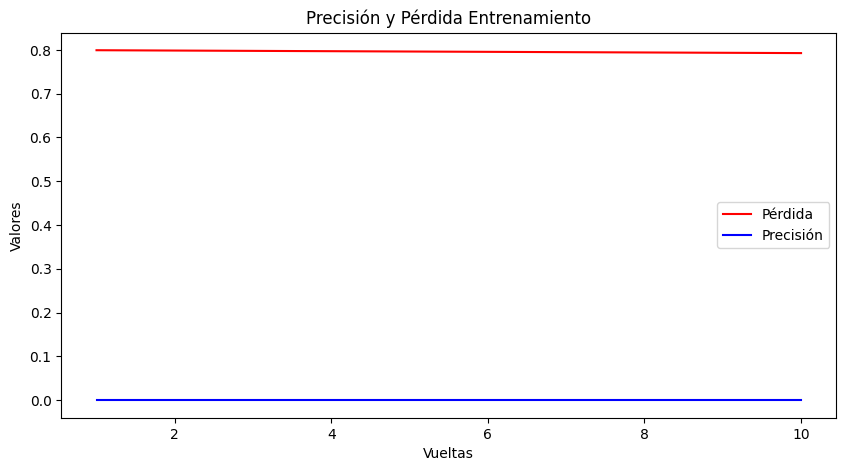

In [72]:
# Obtener la pérdida y la precisión del historial de entrenamiento
loss = history.history['loss']
accuracy = history.history['accuracy']

# Crear el gráfico
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 5))

# Gráfico de pérdida
plt.plot(epochs, loss, 'r', label='Pérdida')
plt.plot(epochs, accuracy, 'b', label='Precisión')

plt.title('Precisión y Pérdida Entrenamiento')
plt.xlabel('Vueltas')
plt.ylabel('Valores')
plt.legend()

plt.show()